In [3]:
import torch
from gym2 import *
from strategycoding import decode_output, encode_state
from packet import packet_summary
import matplotlib.pyplot as plt


In [5]:
count = 0
reward = 0
rewards = []
evaluator = Evaluator(censor_index=0)
while(reward < 50):
    base_packet, packets, response_packets = reset_environment(evaluator)
    # outputs = torch.tensor(np.random.uniform(-1000, 1000, size=NUM_PACKETS*PACKET_SIZE)).float()
    # noise = torch.tensor(np.random.normal(0, 11200, size=outputs.shape))
    # noisy_outputs = outputs + noise
    noisy_outputs = torch.tensor(np.random.uniform(-3000, 1000, size=NUM_PACKETS*PACKET_SIZE)).float()
    # indecies = [0,1,2,3] + [0+PACKET_SIZE,1+PACKET_SIZE,2+PACKET_SIZE,3+PACKET_SIZE]
    # noisy_outputs[indecies] = -10
    modified_packets = decode_output(base_packet, packets, noisy_outputs)


    reward, response_packets = evaluator.evaluate(modified_packets)
    rewards.append(reward)
    if reward > 100:
        print(count)
        break
    count += 1
    if count % 1000 == 0:
        print(count)
    if count % 10000 == 9999:
        plt.plot(np.arange(0, len(rewards), 1), rewards)
        plt.show()



print('Number of Iterations,',count)
print('base:')
packet_summary(base_packet)
print('modified:')
for packet in modified_packets:
    packet_summary(packet)
print('response')
for packet in response_packets:
    packet_summary(packet)



8
Number of Iterations, 8
base:
IP.src=10.10.10.10 | IP.dst=127.0.0.1 | TCP.sport=12345 | TCP.dport=65432 | TCP.flags=S | TCP.chksum=31142 | TCP.seq=0
modified:
IP.src=10.10.10.10 | IP.dst=127.0.0.1 | TCP.sport=12345 | TCP.dport=65432 | TCP.flags=F | TCP.chksum=31143 | TCP.seq=0
IP.src=10.10.10.10 | IP.dst=127.0.0.1 | TCP.sport=12345 | TCP.dport=65432 | TCP.flags=S | TCP.chksum=31142 | TCP.seq=0
response
IP.src=127.0.0.1 | IP.dst=10.10.10.10 | TCP.sport=65432 | TCP.dport=12345 | TCP.flags=FA | TCP.chksum=None | TCP.seq=1000
IP.src=127.0.0.1 | IP.dst=10.10.10.10 | TCP.sport=65432 | TCP.dport=12345 | TCP.flags=SA | TCP.chksum=None | TCP.seq=1000
IP.src=127.0.0.1 | IP.dst=10.10.10.10 | TCP.sport=65432 | TCP.dport=12345 | TCP.flags=PA | TCP.chksum=None | TCP.seq=1000


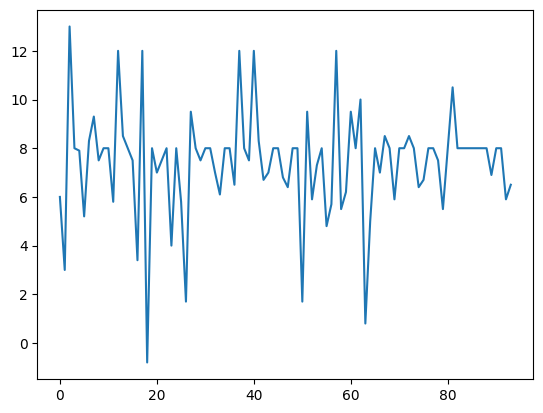

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('rewards2.csv')
data = df.to_numpy()
y = np.array([[i, group.max()] for i, group in enumerate(data[::100,1])])

plt.plot(y[:,0], y[:,1])


plt.show()